# **데이터베이스 클러스터의 물리적 구조**

- 데이터베이스 클러스터는 기본적으로 기본 디렉터리 라고 하는 단일 디렉터리
  - 여기에는 일부 하위 디렉터리와 많은 파일이 포함
- initdb 유틸리티를 실행하여 새 데이터베이스 클러스터를 초기화하면 지정된 디렉터리 아래에 기본 디렉터리가 생성
- 기본 디렉터리의 경로는 일반적으로 환경 변수 PGDATA로 설정

- 데이터베이스는 기본 하위 디렉터리 아래의 하위 디렉터리이며, 각 테이블과 인덱스는 해당 데이터베이스의 하위 디렉터리에 저장된 (적어도) 하나의 파일
- 특정 데이터와 구성 파일을 포함하는 여러 하위 디렉터리가 있음


- PostgreSQL은 테이블스페이스를 지원하지만 용어의 의미는 다른 RDBMS와 다름
- PostgreSQL의 테이블스페이스는 기본 디렉터리 외부의 일부 데이터를 포함하는 단일 디렉터리


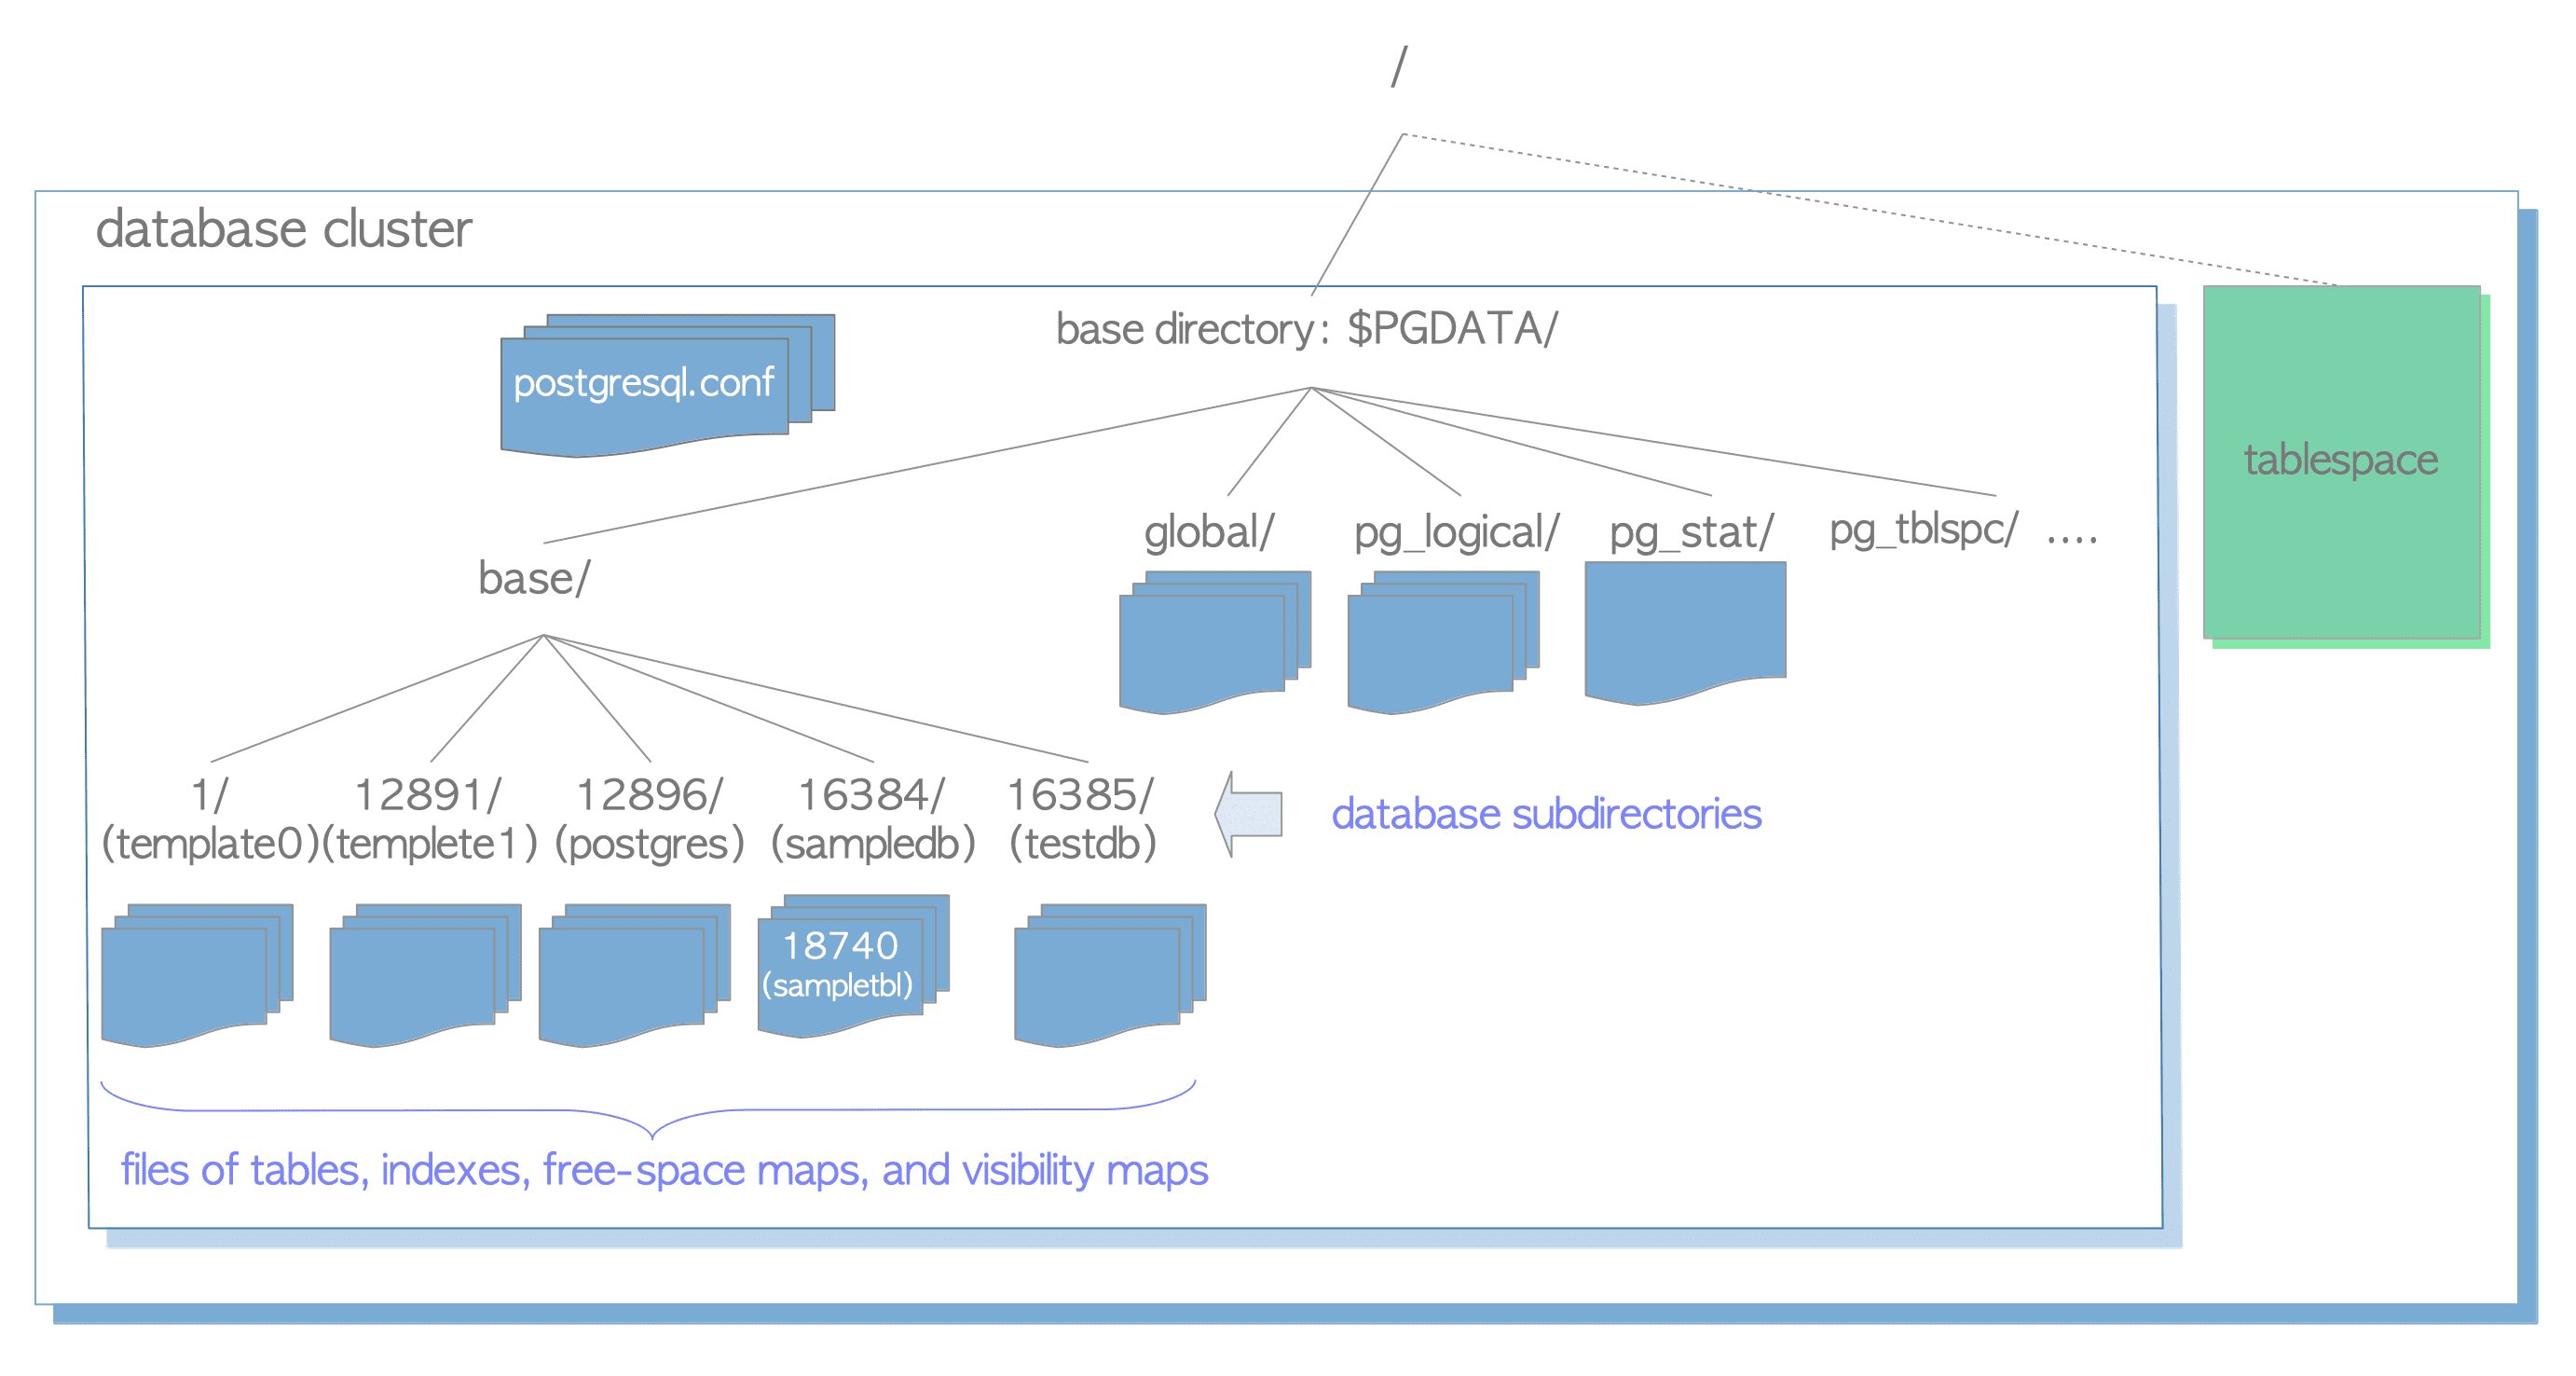

# **데이터베이스 클러스터의 레이아웃**

**기본 디렉터리 아래의 파일 및 하위 디렉터리 레이아웃(공식 문서에서)**

|파일|설명|
|--|--|
|PG_VERSION|PostgreSQL의 주요 버전 번호가 포함된 파일.|
|pg_hba.conf|PostgreSQL의 클라이언트 인증을 제어하는 ​​파일.|
|pg_ident.conf|PostgreSQL의 사용자 이름 매핑을 제어하는 ​​파일.|
|postgresql.conf|구성 매개변수를 설정하는 파일.|
|postgresql.auto.conf|ALTER SYSTEM에 설정된 구성 매개변수를 저장하는 데 사용되는 파일. (버전 9.4 이상)|
|postmaster.opts|서버가 마지막으로 시작된 명령줄 옵션을 기록하는 파일.|
|하위 디렉토리|설명|
|base/|데이터베이스별 하위 디렉터리를 포함하는 하위 디렉터리.|
|global/|pg_database 및 pg_control과 같은 클러스터 전체 테이블을 포함하는 하위 디렉터리.|
|pg_commit_ts/|트랜잭션 커밋 타임스탬프 데이터가 포함된 하위 디렉터리. (버전 9.5 이상)|
|pg_clog/(버전 9.6 이하)|트랜잭션 커밋 상태 데이터가 포함된 하위 디렉터리. 버전 10에서는 pg_xact 로 이름이 바뀜.|
|pg_dynshmem/|동적 공유 메모리 하위 시스템에서 사용하는 파일이 포함된 하위 디렉터리. (버전 9.4 이상)|
|pg_logical/|논리적 디코딩을 위한 상태 데이터가 포함된 하위 디렉터리. (버전 9.4 이상)|
|pg_multixact/|다중 트랜잭션 상태 데이터가 포함된 하위 디렉터리. (공유 행 잠금에 사용됨)|
|pg_notify/|LISTEN/NOTIFY 상태 데이터가 포함된 하위 디렉터리.|
|pg_repslot/|복제 슬롯 데이터가 포함된 하위 디렉터리. (버전 9.4 이상)|
|pg_serial/|커밋된 직렬화 가능 트랜잭션에 대한 정보가 포함된 하위 디렉터리. (버전 9.1 이상)|
|pg_snapshots/|내보낸 스냅샷이 포함된 하위 디렉터리. PostgreSQL의 함수 pg_export_snapshot은 이 하위 디렉터리에 스냅샷 정보 파일을 생성. (버전 9.2 이상)|
|pg_stat/|통계 하위 시스템에 대한 영구 파일이 포함된 하위 디렉터리.|
|pg_stat_tmp/|통계 하위 시스템에 대한 임시 파일이 포함된 하위 디렉터리.|
|pg_subtrans/|하위 트랜잭션 상태 데이터가 포함된 하위 디렉터리.|
|pg_tblspc/|테이블스페이스에 대한 기호 링크가 포함된 하위 디렉토리.|
|pg_twophase/|준비된 트랜잭션에 대한 상태 파일이 포함된 하위 디렉터리.|
|pg_wal/(버전 10 이상)|WAL(Write Ahead Logging) 세그먼트 파일이 포함된 하위 디렉터리. 버전 10에서는 pg_xlog 에서 이름이 변경 |
|pg_xact/(버전 10 이상)|트랜잭션 커밋 상태 데이터가 포함된 하위 디렉터리. 버전 10에서는 pg_clog 에서 이름이 변경.|
|pg_xlog/(버전 9.6 이하)|WAL(Write Ahead Logging) 세그먼트 파일이 포함된 하위 디렉터리. 버전 10에서는 이름이 pg_wal 로 변경.|

# **데이터베이스 레이아웃**

- 데이터베이스는 기본 하위 디렉터리 아래의 하위 디렉터리.
- 데이터베이스 디렉터리 이름은 해당 OID와 동일.
  - 예를 들어, 'sampledb' 데이터베이스의 OID가 16384인 경우 해당 하위 디렉터리 이름은 16384.

```
$ cd $PGDATA
$ ls -ld base/16384
drwx------  213 postgres postgres  7242  8 26 16:33 16384
```

# **테이블 및 인덱스와 관련된 파일의 레이아웃**

- 크기가 1GB 미만인 각 테이블이나 인덱스는 해당 테이블이나 인덱스가 속한 데이터베이스 디렉터리 아래의 단일 파일에 저장.
- 테이블과 인덱스는 내부적으로 개별 OID로 관리되고, 해당 데이터 파일은 relfilenode 변수로 관리.
- 테이블과 인덱스의 relfilenode 값은 기본적으로 해당 OID와 항상 일치 하지는 않음

<br>

**ex. 'sampletbl' 테이블의 OID와 relfilenode를 표시.**

```
sampledb=# SELECT relname, oid, relfilenode FROM pg_class WHERE relname = 'sampletbl';
  relname  |  oid  | relfilenode
-----------+-------+-------------
 sampletbl | 18740 |       18740
(1 row)
```

- 이 경우 oid 및 relfilenode 값은 동일.
- 'sampletbl' 테이블의 데이터 파일 경로가 'base/16384/18740'인 것을 확인.

```
$ cd $PGDATA
$ ls -la base/16384/18740
-rw------- 1 postgres postgres 8192 Apr 21 10:21 base/16384/18740
```

- 테이블과 인덱스의 relfilenode 값은 TRUNCATE, REINDEX, CLUSTER와 같은 특정 명령을 실행하여 변경할 수 있음.
- 예를 들어 'sampletbl' 테이블을 자르면 PostgreSQL은 테이블에 새 relfilenode(18812)를 할당하고 이전 데이터 파일(18740)을 제거한 다음 새 파일(18812)을 생성.

```
sampledb=# TRUNCATE sampletbl;
TRUNCATE TABLE

sampledb=# SELECT relname, oid, relfilenode FROM pg_class WHERE relname = 'sampletbl';
  relname  |  oid  | relfilenode
-----------+-------+-------------
 sampletbl | 18740 |       18812
(1 row)
```

> 버전 9.0 이상에서는 내장 함수 pg_relation_filepath가 유용.
>
> 이 함수는 지정된 OID 또는 이름을 가진 관계의 파일 경로 이름을 반환하기 때문.

> ```
> sampledb=# SELECT pg_relation_filepath('sampletbl');
>  pg_relation_filepath
> ----------------------
>  base/16384/18812
> (1 row)
> ```

- 테이블과 인덱스의 파일 크기가 1GB를 초과하면 PostgreSQL은 relfilenode.1이라는 이름의 새 파일을 생성하여 사용.
- 새 파일이 채워지면 PostgreSQL은 relfilenode.2 등과 같은 이름의 또 다른 새 파일을 생성.

```
$ cd $PGDATA
$ ls -la -h base/16384/19427*
-rw------- 1 postgres postgres 1.0G  Apr  21 11:16 data/base/16384/19427
-rw------- 1 postgres postgres  45M  Apr  21 11:20 data/base/16384/19427.1
```

> 테이블과 인덱스의 최대 파일 크기는 PostgreSQL 구축 시 구성 옵션 “-with-segsize”를 사용하여 변경할 수 있음.

- 데이터베이스 하위 디렉터리를 주의 깊게 살펴보면 각 테이블에 접미사 '_fsm' 및 '_vm'이 붙은 두 개의 관련 파일이 있음을 알 수 있음.
- 이를 각각 여유 공간 맵 과 가시성 맵 이라고 함.

- 여유 공간 맵은 테이블 파일 내 각 페이지의 여유 공간 용량에 대한 정보를 저장하고, 가시성 맵은 테이블 파일 내 각 페이지의 가시성에 대한 정보를 저장.
- 인덱스에는 개별 여유 공간 맵만 있고 가시성 맵은 없음.

<br>

**ex**

```
$ cd $PGDATA
$ ls -la base/16384/18751*
-rw------- 1 postgres postgres  8192 Apr 21 10:21 base/16384/18751
-rw------- 1 postgres postgres 24576 Apr 21 10:18 base/16384/18751_fsm
-rw------- 1 postgres postgres  8192 Apr 21 10:18 base/16384/18751_vm
```

- 여유 공간 맵과 가시성 맵은 내부적으로 각 관계의 분기점 으로 참조될 수도 있음.
- 여유 공간 맵은 테이블/인덱스 데이터 파일의 첫 번째 포크(포크 번호는 1)이고 가시성 맵은 테이블 데이터 파일의 두 번째 포크(포크 번호는 2).
- 데이터 파일의 포크 번호는 0.

# **테이블 스페이스**

- PostgreSQL의 테이블스페이스는 기본 디렉터리 외부의 추가 데이터 영역.
- 이 기능은 버전 8.0에서 구현.

**테이블스페이스의 내부 레이아웃과 기본 데이터 영역과의 관계**.



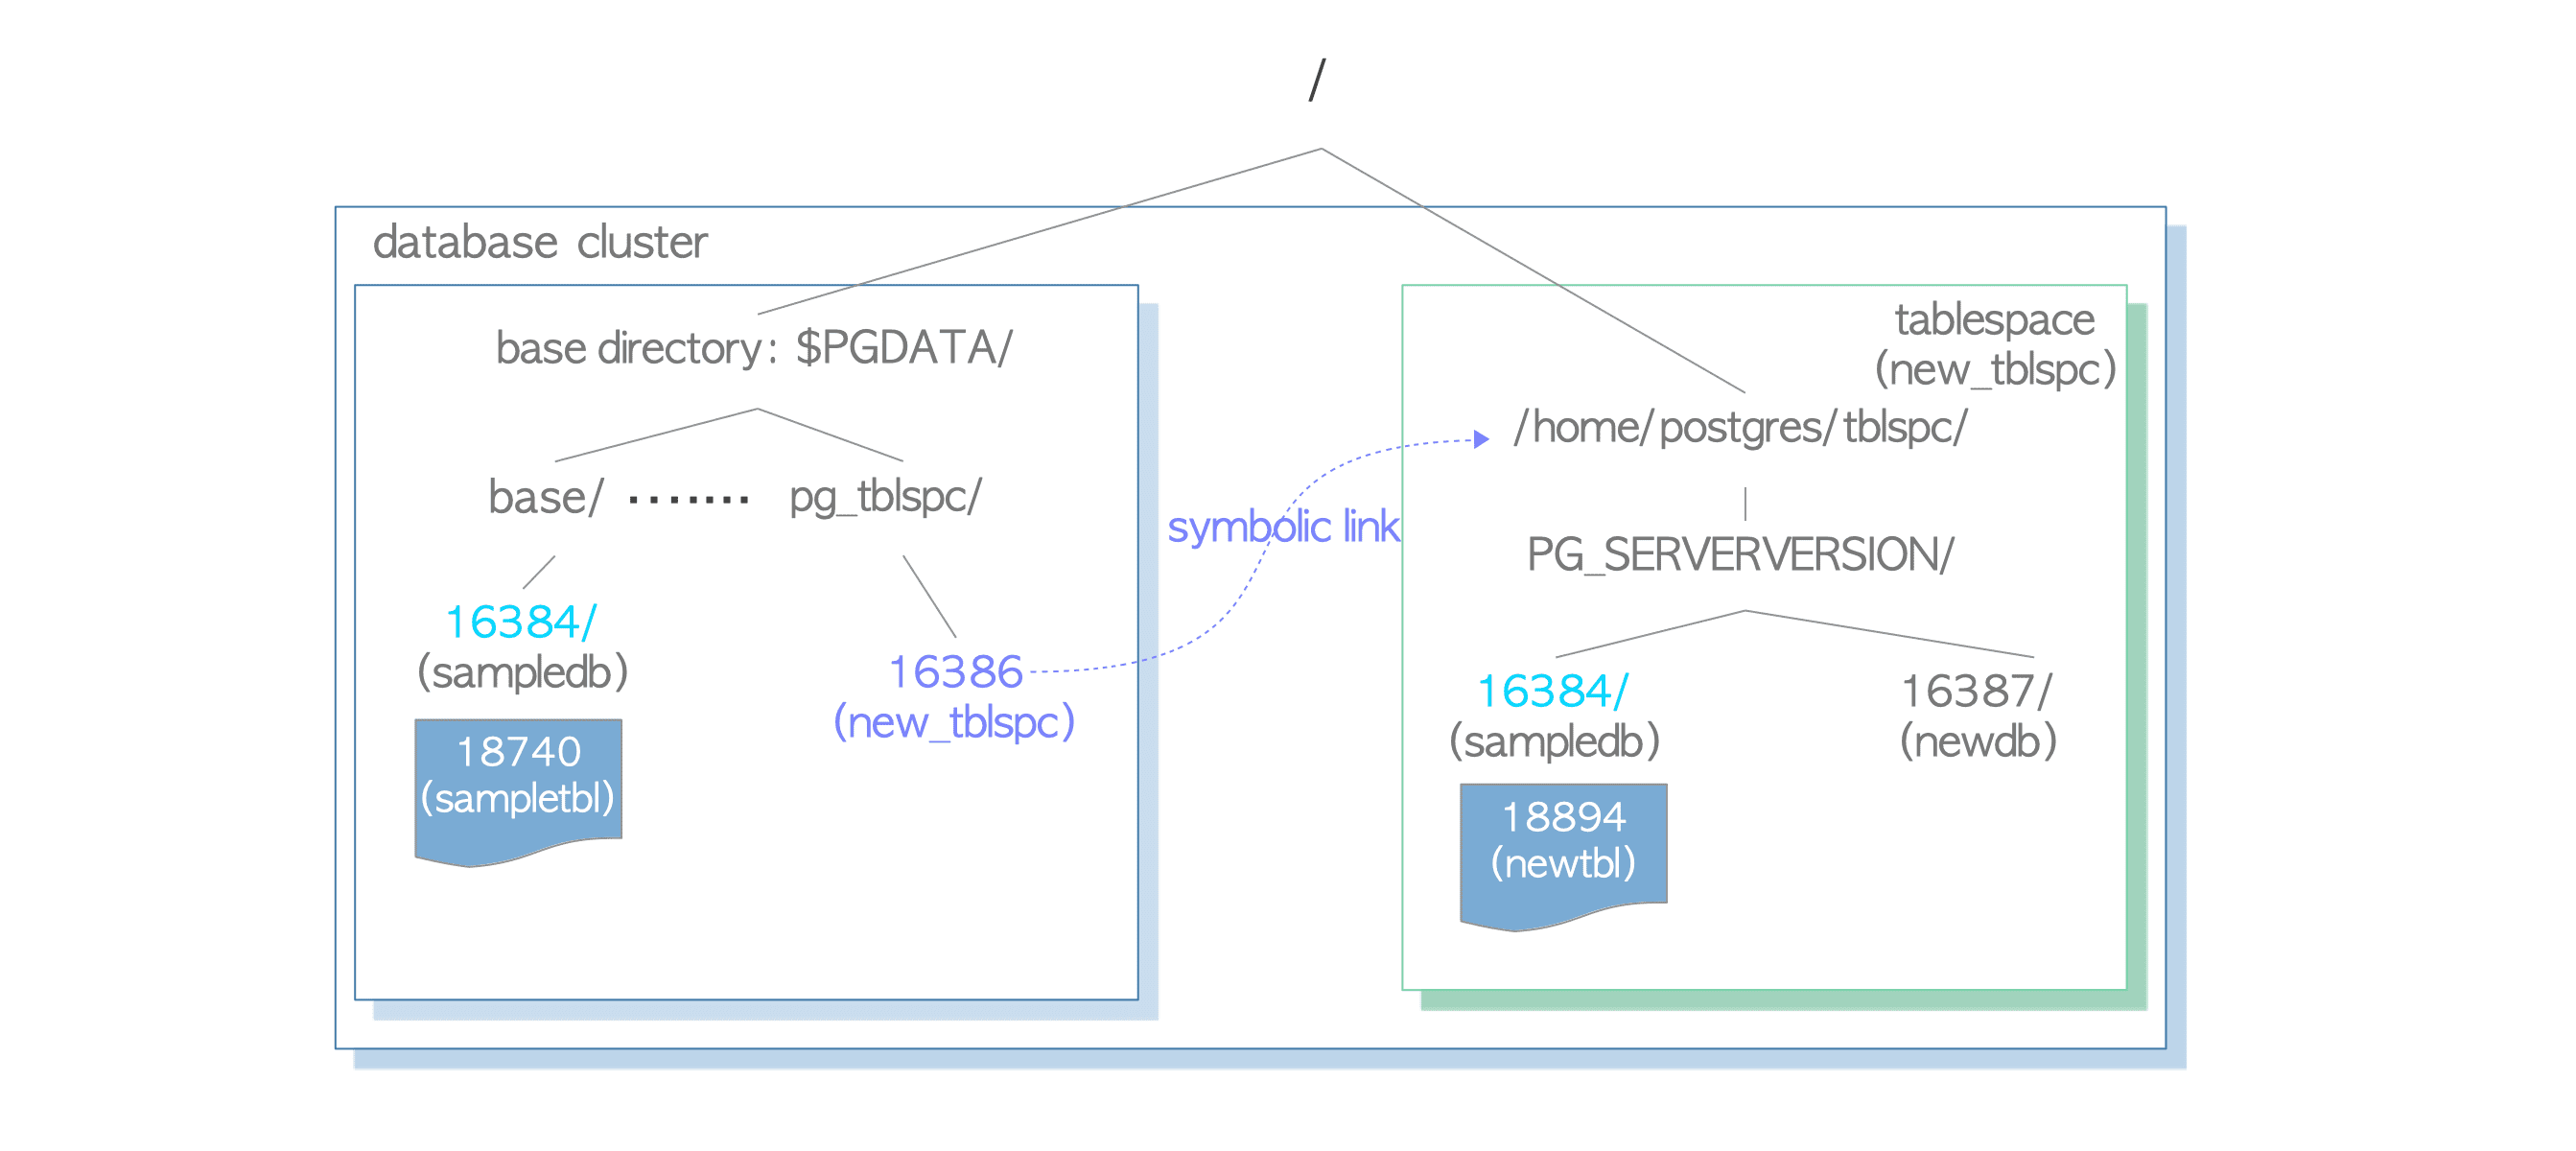

- CREATE TABLESPACE 문을 실행할 때 지정한 디렉터리 아래에 테이블스페이스가 생성됨.
- 해당 디렉터리 아래에 버전별 하위 디렉터리(예: PG_14_202011044)가 생성.
- 버전별 하위 디렉터리의 명명 규칙은 다음과 같음.


```
PG _ 'Major version' _ 'Catalogue version number'
```

- 예를 들어, '/home/postgres/tblspc'에 OID가 16386인 'new_tblspc' 테이블스페이스를 생성하면 해당 테이블스페이스 아래에 'PG_14_202011044'라는 하위 디렉터리가 생성.

```
$ ls -l /home/postgres/tblspc/
total 4
drwx------ 2 postgres postgres 4096 Apr 21 10:08 PG_14_202011044
```

- 테이블스페이스 디렉토리는 pg_tblspc 하위 디렉토리 의 심볼릭 링크로 주소가 지정.
- 링크 이름은 테이블스페이스의 OID 값과 동일.

```
$ ls -l $PGDATA/pg_tblspc/
total 0
lrwxrwxrwx 1 postgres postgres 21 Apr 21 10:08 16386 -> /home/postgres/tblspc
```

- 테이블스페이스 아래에 새 데이터베이스(OID 16387)를 생성하면 해당 디렉터리가 버전별 하위 디렉터리 아래에 생성.

```
$ ls -l /home/postgres/tblspc/PG_14_202011044/
total 4
drwx------ 2 postgres postgres 4096 Apr 21 10:10 16387
```

- 기본 디렉터리에 생성된 데이터베이스에 속한 새 테이블을 생성하면 먼저 버전별 하위 디렉터리 아래에 새 디렉터리가 생성.
- 새 디렉터리의 이름은 기존 데이터베이스의 OID와 동일.
- 그런 다음 생성된 디렉터리 아래에 새 테이블 파일이 배치 됨.

```
sampledb=# CREATE TABLE newtbl (.....) TABLESPACE new_tblspc;

sampledb=# SELECT pg_relation_filepath('newtbl');
             pg_relation_filepath
---------------------------------------------
 pg_tblspc/16386/PG_14_202011044/16384/18894
 ```